# Green Pixel Segmentation

In [131]:
import cv2 
import numpy as np 
import math
import matplotlib.pyplot as plt
image = cv2.imread(filename="/home/inari/Documents/FurrowLineDetector/D9_37_242_1200.jpg")



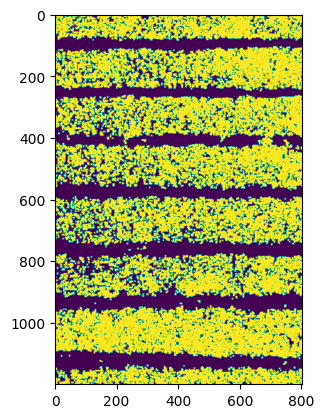

In [132]:
hsv=cv2.cvtColor(src=image,code=cv2.COLOR_BGR2HSV)
hsv_lower=(45,0,0) 
hsv_higher=(86,255,255)
mask=cv2.inRange(hsv, hsv_lower, hsv_higher)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(mask,-1,kernel)

mask =cv2.erode(mask,kernel,iterations=1)
mask =cv2.dilate(mask,kernel)

plt.imshow(mask)
plt.show()

In [133]:

dst = cv2.Canny(mask, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 200, None, 0, 0)
h,w = dst.shape
print(lines)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200*(-b)), int(y0 + 200*(a)))
        pt2 = (int(x0 - 200*(-b)), int(y0 - 200*(a)))
        cv2.line(image, pt1, pt2, (0,255,255), 5, cv2.LINE_AA)


[[[183.          0.       ]]

 [[ 59.          2.3561945]]

 [[ 86.          2.3561945]]

 [[ 87.          0.       ]]

 [[103.          2.3561945]]

 [[231.          0.       ]]

 [[271.          0.       ]]

 [[689.          0.7853982]]

 [[695.          0.       ]]

 [[105.          2.3561945]]

 [[ 39.          0.       ]]

 [[607.          0.       ]]

 [[158.          2.3561945]]

 [[713.          0.7853982]]]


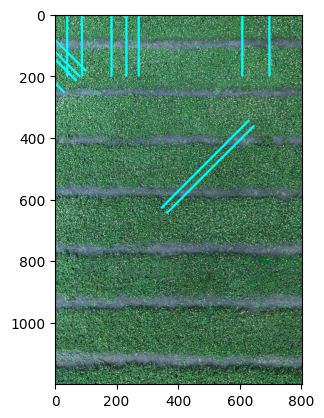

In [134]:
plt.imshow(image)
plt.show()